In [271]:
from tm_vae import prepare_sparse_matrix_nonlabel
from data_prep import prepare_sparse_matrix

In [272]:
import pickle, os

import numpy as np
import scipy.special as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
tf_vectorizer, docs_tr, docs_te, _, label_te = prepare_sparse_matrix(10000, 1000, 3000)

In [186]:
tf, tr, te = prepare_sparse_matrix_nonlabel(10000, 1000, 3000)

In [188]:
tr.shape

(10000, 3000)

In [121]:
test = docs_te.toarray()
test_n = test.sum(1)

## ELBO and Perplexity

In [286]:
def load_results(model_n_topic):
    with open(os.path.join('result', model_n_topic, 'elbo_val.pkl'), 'rb') as f:
        elbo = pickle.load(f)
            
    with open(os.path.join('result', model_n_topic, 'draws.pkl'), 'rb') as f:
        draws = pickle.load(f)
    
    with open(os.path.join('result', model_n_topic, 'pp.pkl'), 'rb') as f:
        pp = pickle.load(f)

    return elbo, draws, pp


In [440]:
n_topic = 5

In [441]:
lda_elbo, lda_draws, lda_pp = load_results(f'lda-{n_topic}')
dirpfa_elbo, dirpfa_draws, dirpfa_pp = load_results(f'dirpfa-{n_topic}')
pfa_elbo, pfa_draws, pfa_pp = load_results(f'pfa-{n_topic}')

In [457]:
np.round(np.exp(-dirpfa_pp.mean()), 3)

230.587

In [458]:
np.round(np.exp(-pfa_pp.mean()), 3)

393.298

In [459]:
np.round(np.exp(-lda_pp.mean()), 3)

3095.323

In [468]:
n_topic = 10

lda_elbo, lda_draws, lda_pp = load_results(f'lda-{n_topic}')
dirpfa_elbo, dirpfa_draws, dirpfa_pp = load_results(f'dirpfa-{n_topic}')
pfa_elbo, pfa_draws, pfa_pp = load_results(f'pfa-{n_topic}')

In [471]:
np.round(np.exp(-dirpfa_pp.mean()), 3)

206.623

In [472]:
np.round(np.exp(-pfa_pp.mean()), 3)

587.799

In [473]:
np.round(np.exp(-lda_pp.mean()), 3)

3376.954

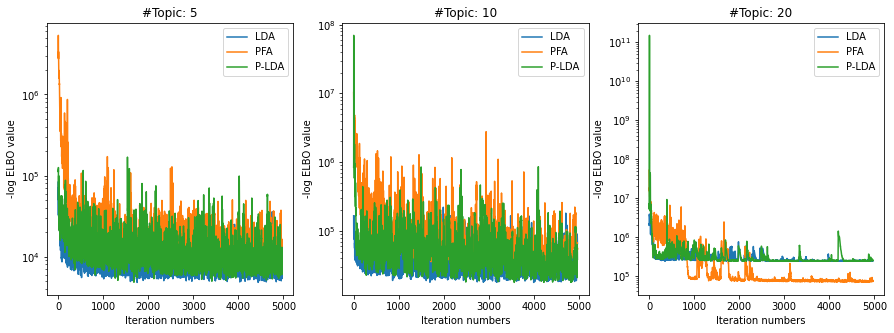

In [490]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, n_topic in zip(axes, [5, 10, 20]):
    lda_elbo, lda_draws, lda_pp = load_results(f'lda-{n_topic}')
    dirpfa_elbo, dirpfa_draws, dirpfa_pp = load_results(f'dirpfa-{n_topic}')
    pfa_elbo, pfa_draws, pfa_pp = load_results(f'pfa-{n_topic}')
    
    ax.plot(lda_elbo[start:], label='lda'.upper())
    ax.plot(pfa_elbo[start:], label='pfa'.upper())
    ax.plot(dirpfa_elbo[start:], label='p-lda'.upper())
    ax.set_yscale('log')
    ax.set_ylabel('-log ELBO value')
    ax.set_xlabel('Iteration numbers')
    ax.set_title(f'#Topic: {n_topic}')
    
    _ = ax.legend()

plt.savefig(os.path.join('fig', 'elbo.png'))

In [ ]:
n_topic = 20

lda_elbo, lda_draws, lda_pp = load_results(f'lda-{n_topic}')
dirpfa_elbo, dirpfa_draws, dirpfa_pp = load_results(f'dirpfa-{n_topic}')
pfa_elbo, pfa_draws, pfa_pp = load_results(f'pfa-{n_topic}')

In [477]:
np.round(np.exp(-dirpfa_pp.mean()), 3)

411.434

In [478]:
np.round(np.exp(-pfa_pp.mean()), 3)

239.692

In [479]:
np.round(np.exp(-lda_pp.mean()), 3)

4332.648

## Coverage Rate

In [510]:
cover_rate = []
for n_topic in [5, 10, 20]:
    dirpfa_elbo, dirpfa_draws, dirpfa_pp = load_results(f'dirpfa-{n_topic}')
    pred_mean = dirpfa_draws['n']
    pred_cnt = np.random.poisson(lam=pred_mean)
    pred_low, pred_high = np.quantile(pred_cnt, [.025, .975], 0)
    is_cover = (pred_low.ravel() < test_n.ravel()) * (pred_high.ravel() > test_n.ravel())
    cover_rate.append(is_cover.mean())

In [522]:
print(cover_rate)

(1000, 1000, 1)

In [531]:
cover_rate = []
for n_topic in [5, 10, 20]: 
    pred_mean = []
    pfa_elbo, pfa_draws, pfa_pp = load_results(f'pfa-{n_topic}')
    theta, phi = pfa_draws['theta'], pfa_draws['beta']
    for i in range(1000):
        theta_ = theta[i]
        phi_ = phi[i]
        pred_mean.append((theta_ @ phi_).sum(1))

    pred_mean = np.c_[pred_mean]
    pred_cnt = np.random.poisson(lam=pred_mean)
    pred_low, pred_high = np.quantile(pred_cnt, [.025, .975], 0)
    is_cover = (pred_low.ravel() < test_n.ravel()) * (pred_high.ravel() > test_n.ravel())
    cover_rate.append(is_cover.mean())


In [532]:
print(cover_rate)

[0.052, 0.042, 0.458]